In [2]:
#Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.inspection import permutation_importance
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import GridSearchCV, StratifiedKFold
import scipy
from scipy.stats import spearmanr
from scipy.cluster import hierarchy
import collections
import zipfile
import requests
import platform

In [3]:
#Data
url1 = 'http://www3.dsi.uminho.pt/pcortez/wine/winequality.zip'
url2 = 'https://drive.google.com/uc?id=1dAb20alBSblCop9UbGjiv9qnS3N-3Kuw'
file = 'raw_data.zip'

In [4]:
try:
  with requests.Session() as s:
    response = s.get(url1)
  open(file,'wb').write(response.content)
  print('Downloaded')
except:
  with requests.Session() as s:
    response = s.get(url2)
  open(file,'wb').write(response.content)
  print('Downloaded')

zip_file = zipfile.ZipFile(file, mode='r')
zip_file.printdir()

Downloaded
File Name                                             Modified             Size
winequality/winequality-names.txt              2009-10-07 15:52:54         2838
winequality/winequality-names.txt.bak          2009-10-07 15:52:28         2838
winequality/winequality-red.csv                2009-06-26 17:45:52        84199
winequality/winequality-white.csv              2009-06-26 17:47:46       264426


In [5]:
path = 'winequality/winequality-red.csv'
wine_csv = zip_file.open(path, mode='r')
wine_csv.readlines()

[b'"fixed acidity";"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"\n',
 b'7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5\n',
 b'7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5\n',
 b'7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;9.8;5\n',
 b'11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58;9.8;6\n',
 b'7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5\n',
 b'7.4;0.66;0;1.8;0.075;13;40;0.9978;3.51;0.56;9.4;5\n',
 b'7.9;0.6;0.06;1.6;0.069;15;59;0.9964;3.3;0.46;9.4;5\n',
 b'7.3;0.65;0;1.2;0.065;15;21;0.9946;3.39;0.47;10;7\n',
 b'7.8;0.58;0.02;2;0.073;9;18;0.9968;3.36;0.57;9.5;7\n',
 b'7.5;0.5;0.36;6.1;0.071;17;102;0.9978;3.35;0.8;10.5;5\n',
 b'6.7;0.58;0.08;1.8;0.097;15;65;0.9959;3.28;0.54;9.2;5\n',
 b'7.5;0.5;0.36;6.1;0.071;17;102;0.9978;3.35;0.8;10.5;5\n',
 b'5.6;0.615;0;1.6;0.089;16;59;0.9943;3.58;0.52;9.9;5\n',
 b'7.8;0.61;0.29;1.6;0.114;9;29;0.9974;3.26;1.56;9.1;5\n',
 b'8.9;0.62

In [6]:
wine_csv.seek(0)
wine = pd.read_csv(wine_csv, sep=';')
wine_csv.close()
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [8]:
wine.columns = wine.columns.str.replace(' ', '_')
wine.head(1)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
wine.columns.get_loc('quality')

11

In [10]:
wine.columns.get_loc('alcohol')

10

In [11]:
new_order = [11,10] + list(range(10))
wine = wine[wine.columns[new_order]] 
wine.head(2)

,quality,alcohol,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates
0,5,9.4,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56
1,5,9.8,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68


In [12]:
#removing duplicates
wine.duplicated()

0       False
1       False
2       False
3       False
4        True
        ...  
1594    False
1595    False
1596     True
1597    False
1598    False
Length: 1599, dtype: bool

In [13]:
wine.drop_duplicates(inplace=True)

In [14]:
wine.reset_index(drop=True, inplace=True)

In [15]:
#save .csv file 
wine.to_csv('red_wine.csv', index =False)

In [16]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1359 entries, 0 to 1358
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   quality               1359 non-null   int64  
 1   alcohol               1359 non-null   float64
 2   fixed_acidity         1359 non-null   float64
 3   volatile_acidity      1359 non-null   float64
 4   citric_acid           1359 non-null   float64
 5   residual_sugar        1359 non-null   float64
 6   chlorides             1359 non-null   float64
 7   free_sulfur_dioxide   1359 non-null   float64
 8   total_sulfur_dioxide  1359 non-null   float64
 9   density               1359 non-null   float64
 10  pH                    1359 non-null   float64
 11  sulphates             1359 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 127.5 KB


In [17]:
wine.isna().sum()

quality                 0
alcohol                 0
fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
dtype: int64

In [18]:
wine.quality.value_counts(sort=False)

3     10
4     53
5    577
6    535
7    167
8     17
Name: quality, dtype: int64

In [ ]:
#wine['quality'].value_counts(sort=False)

3     10
4     53
5    577
6    535
7    167
8     17
Name: quality, dtype: int64

In [19]:
wine.describe()

,quality,alcohol,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,5.623252,10.432315,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705
std,0.823578,1.082065,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667
min,3.000000,8.400000,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000
25%,5.000000,9.500000,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000
50%,6.000000,10.200000,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000
75%,6.000000,11.100000,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000
max,8.000000,14.900000,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000


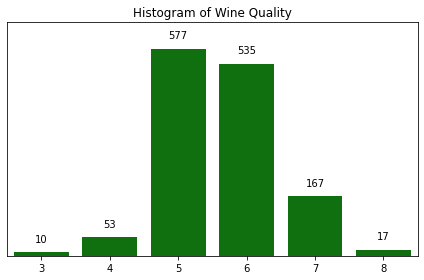

In [20]:
#Histogram of wine quality
plt.figure(figsize=(6,4))
ax = sns.countplot(x='quality', data = wine, color = 'g')
ax.set(title='Histogram of Wine Quality', xlabel='', ylabel='', yticklabels=[])
ax.tick_params(left=False)
ax.set_ylim(0,650)
for p in ax.patches:
  ax.annotate(p.get_height(),
              xy=(p.get_x()+p.get_width()/2,p.get_height()),
              xytext = (0,10),
              textcoords = 'offset points',
              ha = 'center',
              size=10)
plt.tight_layout()

In [21]:
category_dictio = {3:'bad', 4:'bad', 5:'bad',6:'good', 7: 'good', 8:'good'}
wine['quality2'] = wine.quality.map(category_dictio)

In [22]:
wine.quality2.value_counts()

good    719
bad     640
Name: quality2, dtype: int64

In [23]:
np.round(wine.quality2.value_counts()/len(wine)*100,1)

good    52.9
bad     47.1
Name: quality2, dtype: float64

In [24]:
class_labels = ['bad', 'good'] #class lables for graphs
custom_palette = {'bad':'blue', 'good':'red',
                  0:'blue', 1:'red'}

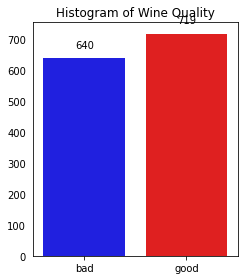

In [25]:
plt.figure(figsize=(3.5,4))

ax = sns.countplot(x='quality2', data=wine, palette=custom_palette)
ax.set(title='Histogram of Wine Quality', xlabel='', ylabel = '')
ax.tick_params(left=False)
for p in ax.patches:
  ax.annotate(p.get_height(),
              xy=(p.get_x() + p.get_width()/2, p.get_height()),
              xytext = {0,10},
              textcoords = 'offset points',
              ha = 'center',
              size=10)

plt.tight_layout()

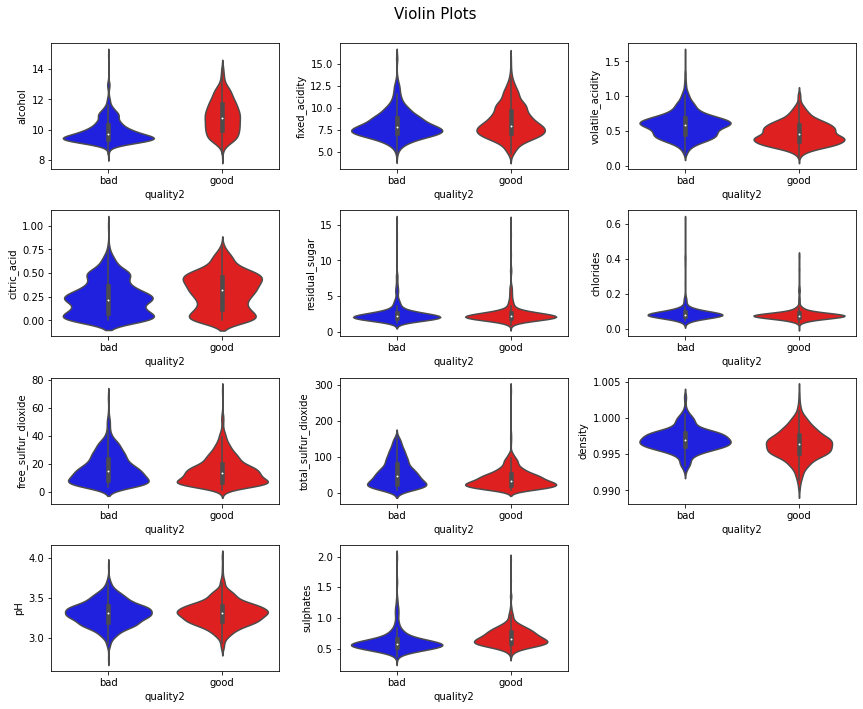

In [26]:
fig,axs = plt.subplots(4,3, figsize=(12,10))
fig.suptitle('Violin Plots', fontsize=15)
column_names = wine.columns[1:12]
for i, column_names in enumerate(column_names):
  sns.violinplot(x='quality2', y=column_names, data=wine, ax=axs[i//3][i%3], palette=custom_palette)

axs[3][2].axis('off')
fig.tight_layout()
fig.subplots_adjust(top=0.93)

In [27]:
#correlation
pearson_corr = wine.iloc[:,1:12].corr(method='pearson')
pearson_corr

,alcohol,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates
alcohol,1.000000,-0.061596,-0.197812,0.105108,0.063281,-0.223824,-0.080125,-0.217829,-0.504995,0.213418,0.091621
fixed_acidity,-0.061596,1.000000,-0.255124,0.667437,0.111025,0.085886,-0.140580,-0.103777,0.670195,-0.686685,0.190269
volatile_acidity,-0.197812,-0.255124,1.000000,-0.551248,-0.002449,0.055154,-0.020945,0.071701,0.023943,0.247111,-0.256948
citric_acid,0.105108,0.667437,-0.551248,1.000000,0.143892,0.210195,-0.048004,0.047358,0.357962,-0.550310,0.326062
residual_sugar,0.063281,0.111025,-0.002449,0.143892,1.000000,0.026656,0.160527,0.201038,0.324522,-0.083143,-0.011837
chlorides,-0.223824,0.085886,0.055154,0.210195,0.026656,1.000000,0.000749,0.045773,0.193592,-0.270893,0.394557
free_sulfur_dioxide,-0.080125,-0.140580,-0.020945,-0.048004,0.160527,0.000749,1.000000,0.667246,-0.018071,0.056631,0.054126
total_sulfur_dioxide,-0.217829,-0.103777,0.071701,0.047358,0.201038,0.045773,0.667246,1.000000,0.078141,-0.079257,0.035291
density,-0.504995,0.670195,0.023943,0.357962,0.324522,0.193592,-0.018071,0.078141,1.000000,-0.355617,0.146036
pH,0.213418,-0.686685,0.247111,-0.550310,-0.083143,-0.270893,0.056631,-0.079257,-0.355617,1.000000,-0.214134


In [28]:
spearman_corr = wine.iloc[:,1:12].corr(method='spearman')
spearman_corr

,alcohol,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates
alcohol,1.000000,-0.062696,-0.225714,0.090798,0.112205,-0.301525,-0.099386,-0.275353,-0.470019,0.183005,0.207636
fixed_acidity,-0.062696,1.000000,-0.280162,0.657387,0.222396,0.244095,-0.157857,-0.083827,0.626628,-0.708560,0.220696
volatile_acidity,-0.225714,-0.280162,1.000000,-0.610925,0.031299,0.170678,0.012162,0.092548,0.032264,0.245973,-0.324207
citric_acid,0.090798,0.657387,-0.610925,1.000000,0.170096,0.110679,-0.059585,0.021124,0.344303,-0.558594,0.341512
residual_sugar,0.112205,0.222396,0.031299,0.170096,1.000000,0.215528,0.077652,0.141515,0.414489,-0.091543,0.029702
chlorides,-0.301525,0.244095,0.170678,0.110679,0.215528,1.000000,0.010096,0.141324,0.420550,-0.234452,0.033630
free_sulfur_dioxide,-0.099386,-0.157857,0.012162,-0.059585,0.077652,0.010096,1.000000,0.789881,-0.025635,0.090857,0.041320
total_sulfur_dioxide,-0.275353,-0.083827,0.092548,0.021124,0.141515,0.141324,0.789881,1.000000,0.137455,-0.029526,-0.008333
density,-0.470019,0.626628,0.032264,0.344303,0.414489,0.420550,-0.025635,0.137455,1.000000,-0.322763,0.157787
pH,0.183005,-0.708560,0.245973,-0.558594,-0.091543,-0.234452,0.090857,-0.029526,-0.322763,1.000000,-0.100048


In [29]:
mask = np.triu(np.ones_like(pearson_corr, dtype=bool), k=0)
cmap = sns.diverging_palette(150,275)

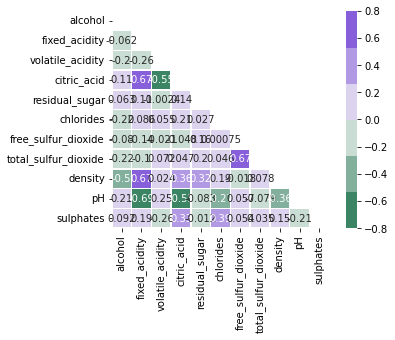

In [30]:
sns.heatmap(pearson_corr, mask=mask, annot=True, cmap=cmap,
            cbar = True, square = True, linewidths=.5,
            vmax=0.8, vmin=-0.8, center=0)
ax.set_title('Pearson Correlation Matrix')
fig.tight_layout()


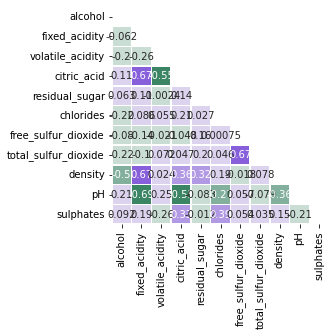

In [31]:

sns.heatmap(pearson_corr, mask=mask, annot=True, cmap=cmap,
            cbar = False, square = True, linewidths=.5,
            vmax=0.8, vmin=-0.8, center=0)
ax.set_title('Spearman Correlation Matrix')

fig.tight_layout()

In [32]:
#label encoding
X = wine.iloc[:,1:12]
y = LabelEncoder().fit_transform(wine.quality2)

In [33]:
np.unique(y,return_counts=True)

(array([0, 1]), array([640, 719]))

In [34]:
class_dictionary = {'bad': 0, 'good':1}
y = wine.quality2.map(class_dictionary)
y.value_counts(sort=False)

0    640
1    719
Name: quality2, dtype: int64

In [37]:
feature_names = np.array(X.columns)
print('Number of features=', len(feature_names))
print(feature_names)

Number of features= 11
['alcohol' 'fixed_acidity' 'volatile_acidity' 'citric_acid'
 'residual_sugar' 'chlorides' 'free_sulfur_dioxide' 'total_sulfur_dioxide'
 'density' 'pH' 'sulphates']


In [38]:
#Generating training, validation and testing sets

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=2**9, stratify = y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=0.5, random_state= 9**2, stratify = y_train) 

In [39]:
print('Distribution by classes')
pd.DataFrame({'train set': np.unique(y_train, return_counts=True)[1],
              'validation set': np.unique(y_val,return_counts=True)[1],
              'test set': np.unique(y_test, return_counts=True)[1]})

Distribution by classes


,train set,validation set,test set
0,256,256,128
1,287,288,144


In [48]:
#Model Accuracy
def print_outputs(X, X_train, X_val, y, y_train, y_val, y_test, clf, title='Confusion Matrix'):
  train_score = clf.score(X_train, y_train)
  val_score = clf.score(X_val, y_val)
  test_score = clf.score(X_test, y_test)

  print("Accuracy on training set = {:.2f}".format(train_score))

  print("Accuracy on validation set = {:.2f}".format(val_score))

  print("Accuracy on test set = {:.2f}".format(test_score))

  print("Total Accuracy = {:.2f}".format(clf.score(X,y)))


  y_train_pred = clf.predict(X_train)

  y_val_pred = clf.predict(X_val)

  y_test_pred = clf.predict(X_test)

  cm = [] #confusion Matrix
  cm.append(pd.DataFrame(confusion_matrix(y_train,y_train_pred)))
  cm.append(pd.DataFrame(confusion_matrix(y_val,y_val_pred)))
  cm.append(pd.DataFrame(confusion_matrix(y_test,y_test_pred)))

  fig, (ax1, ax2, ax3)= plt.subplots(1,3,figsize= (10,3))
  fig.suptitle(title,fontsize=15)
  axs = [ax1,ax2,ax3]

  for i in range(3):
    sns.heatmap(cm[i], annot=True, fmt=',.0f', cbar=False, cmap ='YlGnBu', ax=axs[i])
    axs[i].set(xticklabels=class_labels, yticklabels=class_labels, xlabel = 'Predicted', ylabel = 'Accurate')

  ax1.set_title('Training Accuracy = {:,.2f}'.format(train_score))
  ax2.set_title('Validation Accuracy = {:,.2f}'.format(val_score))
  ax3.set_title('Test Accuracy = {:,.2f}'.format(test_score))

  fig.tight_layout()
  fig.subplots_adjust(top=0.80)

Accuracy on training set = 1.00
Accuracy on validation set = 0.76
Accuracy on test set = 0.73
Total Accuracy = 0.85


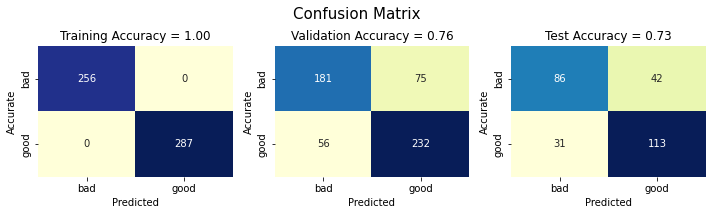

In [49]:
#train classifier
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train,y_train)

print_outputs(X, X_train, X_val, y, y_train, y_val, y_test, clf)